This script visualizes the results of a grid search over Berp parameters.

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# results_dir = Path("../results/gillis2021/models_berp_grid/berp-fixed/")
# results_dir = Path("../work/2b/cda8e6c76a9235517148309c3afb33/")
results_dir = Path("../work/6a/13acff29799f3c1dc2122961c28d9b/")

In [4]:
trial_df_paths = list(results_dir.glob("**/trials.csv"))
trial_df_paths = [p for p in trial_df_paths if "noreconset" not in str(p)]
trial_dfs = [pd.read_csv(path) for path in trial_df_paths]
trials_df = pd.concat(trial_dfs, keys=trial_df_paths)
trials_df

number     value  \
../work/6a/13acff29799f3c1dc2122961c28d9b/berp-... 0         0  0.027160   
                                                   1         1  0.028037   
                                                   2         2  0.028108   
                                                   3         3  0.027529   
                                                   4         4  0.027744   
...                                                        ...       ...   
../work/6a/13acff29799f3c1dc2122961c28d9b/berp-... 495     495  0.028850   
                                                   496     496  0.028837   
                                                   497     497  0.028500   
                                                   498     498  0.028184   
                                                   499     499  0.028460   

                                                                    datetime_start  \
../work/6a/13acff29799f3c1dc2122961c28d9b/berp-... 0    2022-09-17 16:36:10.941321   
                                                   1    2022-09-17 16:42:57.613771   
                                                   2    2022-09-17 16:49:42.392350   
                                                   3    2022-09-17 16:56:28.972640   
                                                   4    2022-09-17 17:01:03.354185   
...                                                                            ...   
../work/6a/13acff29799f3c1dc2122961c28d9b/berp-... 495  2022-09-18 14:21:16.115944   
                                                   496  2022-09-18 14:23:03.837256   
                                                   497  2022-09-18 14:24:50.819866   
                                                   498  2022-09-18 14:26:41.468636   
                                                   499  2022-09-18 14:28:26.972490   

                                                                 datetime_complete  \
../work/6a/13acff29799f3c1dc2122961c28d9b/berp-... 0    2022-09-17 16:40:46.422253   
                                                   1    2022-09-17 16:47:31.995798   
                                                   2    2022-09-17 16:54:18.079303   
                                                   3    2022-09-17 17:01:03.352454   
                                                   4    2022-09-17 17:05:37.861272   
...                                                                            ...   
../work/6a/13acff29799f3c1dc2122961c28d9b/berp-... 495  2022-09-18 14:23:03.650431   
                                                   496  2022-09-18 14:24:50.643639   
                                                   497  2022-09-18 14:26:41.421722   
                                                   498  2022-09-18 14:28:26.879391   
                                                   499  2022-09-18 14:30:20.528290   

                                                                      duration  \
../work/6a/13acff29799f3c1dc2122961c28d9b/berp-... 0    0 days 00:04:35.480932   
                                                   1    0 days 00:04:34.382027   
                                                   2    0 days 00:04:35.686953   
                                                   3    0 days 00:04:34.379814   
                                                   4    0 days 00:04:34.507087   
...                                                                        ...   
../work/6a/13acff29799f3c1dc2122961c28d9b/berp-... 495  0 days 00:01:47.534487   
                                                   496  0 days 00:01:46.806383   
                                                   497  0 days 00:01:50.601856   
                                                   498  0 days 00:01:45.410755   
                                                   499  0 days 00:01:53.555800   

                                                        params_encoder__alpha  \
../work/6a/

In [5]:
param_cols = [c for c in trials_df.columns if c.startswith("params_")]
melted_df = trials_df[["value"] + param_cols].melt(id_vars="value", value_name="param_val")

In [6]:
log_param_cols = [f"params_{x}" for x in ["encoder__alpha", "encoder__init_scale", "encoder__optim__learning_rate"]]
melted_log_df = melted_df[melted_df.variable.isin(log_param_cols)]
melted_norm_df = melted_df[~melted_df.variable.isin(log_param_cols)]

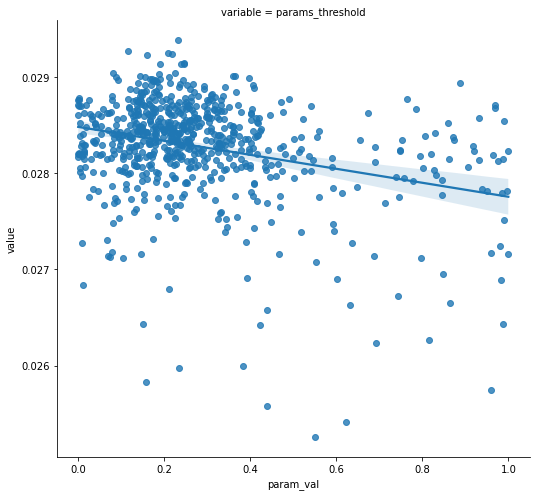

In [7]:
g = sns.FacetGrid(data=melted_norm_df, col="variable", col_wrap=3, sharex=False, sharey=True, height=7)
g.map(sns.regplot, "param_val", "value")

/tmp/ipykernel_188814/3795883258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_log_df["log_param_val"] = np.log10(melted_log_df.param_val)


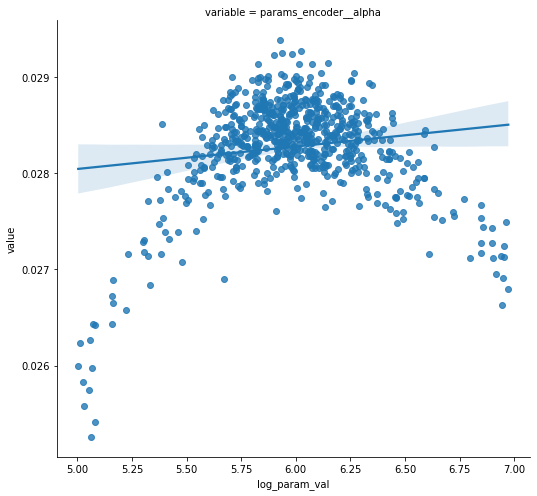

In [8]:
melted_log_df["log_param_val"] = np.log10(melted_log_df.param_val)
g = sns.FacetGrid(data=melted_log_df, col="variable", col_wrap=3, sharex=False, sharey=True, height=7)
g.map(sns.regplot, "log_param_val", "value")

<AxesSubplot:xlabel='params_threshold', ylabel='value'>

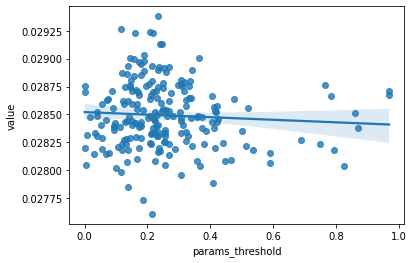

In [9]:
sns.regplot(data=trials_df[(trials_df.params_encoder__alpha > 10 ** 5.9) & (trials_df.params_encoder__alpha < 10 ** 6.1)],
            x="params_threshold", y="value")

In [10]:
trials_df["log_params_encoder__alpha"] = np.log10(trials_df.params_encoder__alpha)

In [11]:
# plt.subplots(figsize=(10, 10))
# sns.kdeplot(data=trials_df[trials_df.value > 0.026], x="params_threshold", y="log_params_encoder__alpha",
#             hue="value")

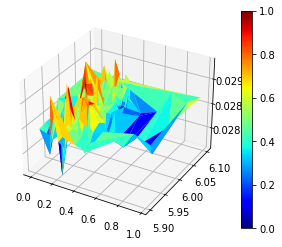

In [12]:
ax = plt.subplot(projection='3d')
cm = plt.cm.ScalarMappable(cmap=plt.cm.jet)
to_plot = trials_df[(trials_df.log_params_encoder__alpha > 5.9) & (trials_df.log_params_encoder__alpha < 6.1)]
ax.plot_trisurf(to_plot.params_threshold, to_plot.log_params_encoder__alpha,
                to_plot.value, cmap=plt.cm.jet)
plt.colorbar(cm, ax=ax)
plt.show()

In [17]:
trials_df["log_params_encoder__alpha_bin"] = pd.qcut(trials_df.log_params_encoder__alpha, q=10)
trials_df["params_threshold_bin"] = pd.qcut(trials_df.params_threshold, 50, labels=False)

<AxesSubplot:xlabel='params_threshold_bin', ylabel='value'>

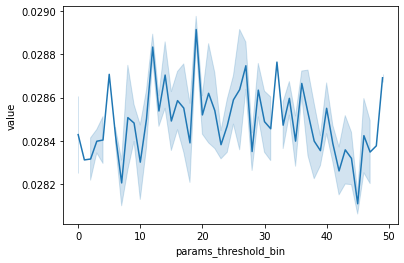

In [18]:
sns.lineplot(data=trials_df[(trials_df.log_params_encoder__alpha > 5.9) & (trials_df.log_params_encoder__alpha < 6.1)],
             x="params_threshold_bin", y="value", errorbar="se")#, hue="log_params_encoder__alpha_bin")